# Machine Learning: Statistical Analysis and Model Generation

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from imblearn.over_sampling import SMOTE

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

# set current working directory to root level
os.chdir('c:/Users/01eco/Documents/Programming/Python/multisource_ML_research')
random_state = 42


### Statistical Analysis of Processed Dataset
The following analysis of a single bin is assumed to share similar statistical properties to the rest of the dataset

In [2]:
# Use bin 0 from window size 1 set for statistical analysis and feature selection
analysis_df = pd.read_csv('data/processed_data/merged_data_1/bin_0.csv')

In [3]:
analysis_df.shape

(32796, 79)

In [4]:
analysis_df.dtypes

Timestamp_t0                      float64
CoG Acceleration/X_t0             float64
CoG Acceleration/Y_t0             float64
CoG position/X_t0                 float64
CoG position/Y_t0                 float64
CoG position/Roll_t0              float64
CoG position/Pitch_t0             float64
CoG position/Yaw_t0               float64
Horizontal tangential speed_t0    float64
Over-steering criteria_t0         float64
Pitch %ground_t0                  float64
Pitch acceleration_t0             float64
Pitch speed_t0                    float64
Roll %ground_t0                   float64
Roll acceleration_t0              float64
Roll speed_t0                     float64
Slope force_t0                    float64
Speed/X_t0                        float64
Speed/Y_t0                        float64
Tangent Acceleration/X_t0         float64
Tangent Acceleration/Y_t0         float64
Tangential speed_t0               float64
Yaw %ground_t0                    float64
Yaw acceleration_t0               

In [5]:
# ! Eye tracking for the following is either missing completely or only contains timestamps and nothing else
# ! This issue is resolved later since the processing is built off the participant summary list and removing participant data will cause issues
# * Participant 2 - lthalf
# * Participant 9 - ltsignal, ltminor, lthalf
# * Participant 19 - all
# * Participant 26 - lthalf, ltsignal, ltmajor
# * Participant 49 - ltmajor
# * Participant 51 - lthalf 
analysis_df.isna().sum()

Timestamp_t0                      0
CoG Acceleration/X_t0             0
CoG Acceleration/Y_t0             0
CoG position/X_t0                 0
CoG position/Y_t0                 0
CoG position/Roll_t0              0
CoG position/Pitch_t0             0
CoG position/Yaw_t0               0
Horizontal tangential speed_t0    0
Over-steering criteria_t0         0
Pitch %ground_t0                  0
Pitch acceleration_t0             0
Pitch speed_t0                    0
Roll %ground_t0                   0
Roll acceleration_t0              0
Roll speed_t0                     0
Slope force_t0                    0
Speed/X_t0                        0
Speed/Y_t0                        0
Tangent Acceleration/X_t0         0
Tangent Acceleration/Y_t0         0
Tangential speed_t0               0
Yaw %ground_t0                    0
Yaw acceleration_t0               0
Yaw speed_t0                      0
Brake pedal force_t0              0
Gas pedal_t0                      0
Steering wheel angle_t0     

In [6]:
analysis_df.nunique()

Timestamp_t0                      32444
CoG Acceleration/X_t0             31656
CoG Acceleration/Y_t0             31705
CoG position/X_t0                 31132
CoG position/Y_t0                 30485
CoG position/Roll_t0              31702
CoG position/Pitch_t0             31523
CoG position/Yaw_t0               29464
Horizontal tangential speed_t0    31407
Over-steering criteria_t0         31683
Pitch %ground_t0                  31524
Pitch acceleration_t0             31686
Pitch speed_t0                    31699
Roll %ground_t0                   31703
Roll acceleration_t0              31713
Roll speed_t0                     31715
Slope force_t0                    31557
Speed/X_t0                        31615
Speed/Y_t0                        31707
Tangent Acceleration/X_t0         31649
Tangent Acceleration/Y_t0         31700
Tangential speed_t0               31600
Yaw %ground_t0                    29463
Yaw acceleration_t0               31708
Yaw speed_t0                      31705


In [7]:
analysis_df.describe()

c:\Users\01eco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Timestamp_t0  CoG Acceleration/X_t0  CoG Acceleration/Y_t0  \
count  32796.000000           32796.000000           32796.000000   
mean     307.752110            3942.822940             -12.698351   
std      154.034808           17078.247248             174.532024   
min       52.001500           -1790.741797           -2097.396855   
25%      211.519062               0.006649              -0.023348   
50%      277.371741               1.570423               0.007435   
75%      439.516385               7.156413               0.950846   
max      587.088328          160008.826369            1301.036352   

       CoG position/X_t0  CoG position/Y_t0  CoG position/Roll_t0  \
count       32796.000000       32796.000000          32796.000000   
mean         3813.967249          -6.521163             -3.949065   
std          2444.050148          23.356719             75.740943   
min         -1087.002439        -139.650871           -869.989586   
25%          1352.259981         -24.116535             -0.013115   
50%          3776.978671          -9.065293             -0.000146   
75%          5319.983864           8.280899              0.096175   
max          9442.084777         129.916658            601.492332   

       CoG position/Pitch_t0  CoG position/Yaw_t0  \
count           32796.000000         3.279600e+04   
mean                4.945372         5.699523e+11   
std               303.662626         4.080215e+12   
min             -2338.509866        -2.160616e+03   
25%                -1.006057        -1.054955e+00   
50%                -0.582735         8.956855e-02   
75%                -0.350020         1.796300e+02   
max              2853.445478         5.195750e+13   

       Horizontal tangential speed_t0  Over-steering criteria_t0  \
count                    3.279600e+04               32796.000000   
mean                     2.950771e+06                   0.065052   
std                      3.067459e+07                   0.905431   
min                     -4.683197e+08                  -9.319209   
25%                      2.729449e+03                  -0.000512   
50%                      1.083599e+04                   0.000013   
75%                      1.841122e+04                   0.000280   
max                      3.276472e+08                   6.280968   

       Pitch %ground_t0  Pitch acceleration_t0  Pitch speed_t0  \
count      32796.000000           3.279600e+04    32796.000000   
mean           4.720574           6.117751e+07      -14.126473   
std          303.577781           8.435696e+08      678.813614   
min        -2336.835301          -8.440596e+08    -6061.091827   
25%           -1.030390          -5.082519e+00       -0.515935   
50%           -0.596085           1.223680e-02       -0.090592   
75%           -0.356617           1.581621e+01        0.097490   
max         2852.891132           1.880262e+10     5418.603167   

       Roll %ground_t0  Roll acceleration_t0  Roll speed_t0  Slope force_t0  \
count     32796.000000          3.279600e+04   32796.000000    32796.000000   
mean         -3.972016          1.805682e+09     -25.897108        7.482949   
std          75.729865          1.268610e+10     199.050623       68.759948   
min        -869.989586         -2.837110e+10   -2085.910993     -114.011488   
25%          -0.013036         -7.751250e-01      -0.026693       -0.011760   
50%          -0.000146          1.945160e-01       0.000516       -0.003975   
75%           0.095885          2.065830e+01       0.222223       -0.002417   
max         601.492332          1.584141e+11     901.261572     1043.523478   

         Speed/X_t0    Speed/Y_t0  Tangent Acceleration/X_t0  \
count  32796.000000  32796.000000               32796.000000   
mean    -124.723872      2.147329                3943.628100   
std     1232.089786     15.670723               17081.592252   
min   -14559.675344    -81.985635               -1790.954647   
25%        6.399970     -0.014970            

Pitch, roll and yaw acceleration for the hazard vehicles can be removed since there is no variability in the data. The following columns can have their duplicates removed, if any

In [8]:
col_list = analysis_df.columns.tolist()

# compare columns pairwise to check for duplicate columns
for i in range(len(col_list)):
    for j in range(i + 1, len(col_list)):
        if analysis_df[col_list[i]].equals(analysis_df[col_list[j]]):
            print(f"'{col_list[i]}' and '{col_list[j]}' have identical values")

'Pitch acceleration.hazard_t0' and 'Roll acceleration.hazard_t0' have identical values
'Pitch acceleration.hazard_t0' and 'Yaw acceleration.hazard_t0' have identical values
'Roll acceleration.hazard_t0' and 'Yaw acceleration.hazard_t0' have identical values
'Speed/X.hazard_t0' and 'Tangential speed.hazard_t0' have identical values


In [9]:
plt.subplots(figsize=(100,100))
sns.heatmap(analysis_df.corr(numeric_only=True),cmap='coolwarm',annot=True)

plt.tick_params(axis='both',which='both',bottom=True,top=True,left=True,right=True,labelbottom=True,labeltop=True,labelleft=True,labelright=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

os.makedirs('results/statistical_analysis', exist_ok=True)
plt.savefig('results/statistical_analysis/correlation_map.png')
plt.show()

## Machine Learning Setup

In [10]:
window_size = 20

In [11]:
train_df = pd.read_csv(f'data/processed_data/final_data_{window_size}/training.csv')
test_df = pd.read_csv(f'data/processed_data/final_data_{window_size}/testing.csv')
validate_df = pd.read_csv(f'data/processed_data/final_data_{window_size}/validation.csv')

C:\Users\01eco\AppData\Local\Temp\ipykernel_8608\1246784373.py:1: DtypeWarning: Columns (61,140,219,298,377,456,535,614,693,772,851,930,1009,1088,1167,1246,1325,1404,1483,1562) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(f'data/processed_data/final_data_{window_size}/training.csv')


In [12]:
print(train_df.shape)
print(test_df.shape)
print(validate_df.shape)

(226282, 1580)
(32496, 1580)
(60984, 1580)


### Perform Cleaning Stage
Remove features based on information gathered from the statistical analysis and correlation

In [13]:
columns = train_df.columns.to_list()
remove_cols = ['Pitch acceleration.hazard_','Roll acceleration.hazard_','Yaw acceleration.hazard_']
for rc in remove_cols:
    for c in columns:
        if rc in c:
            train_df.drop(columns=[c],inplace=True)
            test_df.drop(columns=[c],inplace=True)
            validate_df.drop(columns=[c],inplace=True)

print(train_df.shape)

(226282, 1520)


In [14]:
# Set all boolean values to 0 or 1
train_df.replace({False: 0, True: 1,'False': 0, 'True': 1,'0.0': 0,'1.0': 1},inplace=True)
test_df.replace({False: 0, True: 1,'False': 0, 'True': 1,'0.0': 0,'1.0': 1},inplace=True)
validate_df.replace({False: 0, True: 1,'False': 0, 'True': 1,'0.0': 0,'1.0': 1},inplace=True)

C:\Users\01eco\AppData\Local\Temp\ipykernel_8608\2793344722.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df.replace({False: 0, True: 1,'False': 0, 'True': 1,'0.0': 0,'1.0': 1},inplace=True)
C:\Users\01eco\AppData\Local\Temp\ipykernel_8608\2793344722.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df.replace({False: 0, True: 1,'False': 0, 'True': 1,'0.0': 0,'1.0': 1},inplace=True)
C:\Users\01eco\AppData\Local\Temp\ipykernel_8608\2793344722.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated an

In [15]:
# Drop any missing rows (eye tracking data is missing from these rows directly from the first stage)
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
validate_df.dropna(inplace=True)

In [16]:
if window_size == 1:
    plt.subplots(figsize=(100,100))
    sns.heatmap(train_df.corr(numeric_only=True),cmap='coolwarm',annot=True)

    plt.tick_params(axis='both',which='both',bottom=True,top=True,left=True,right=True,labelbottom=True,labeltop=True,labelleft=True,labelright=True)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)

    os.makedirs('results/statistical_analysis', exist_ok=True)
    plt.savefig('results/statistical_analysis/correlation_map_training.png')
    plt.show()

In [17]:
# pull the labels from the dataframes into separate arrays
train_df_y_reg = train_df[[c for c in train_df.columns.to_list() if 'time_to_collision_flag' in c][-1]]
train_df_y_class = train_df[[c for c in train_df.columns.to_list() if 'global_collision_flag' in c][-1]]

test_df_y_reg = test_df[[c for c in test_df.columns.to_list() if 'time_to_collision_flag' in c][-1]]
test_df_y_class = test_df[[c for c in test_df.columns.to_list() if 'global_collision_flag' in c][-1]]

validate_df_y_reg = validate_df[[c for c in validate_df.columns.to_list() if 'time_to_collision_flag' in c][-1]]
validate_df_y_class = validate_df[[c for c in validate_df.columns.to_list() if 'global_collision_flag' in c][-1]]

# Remove all label features after separating them
columns = train_df.columns.to_list()
remove_cols = ['time_to_collision_flag','global_collision_flag']
for rc in remove_cols:
    for c in columns:
        if rc in c:
            train_df.drop(columns=[c],inplace=True)
            test_df.drop(columns=[c],inplace=True)
            validate_df.drop(columns=[c],inplace=True)

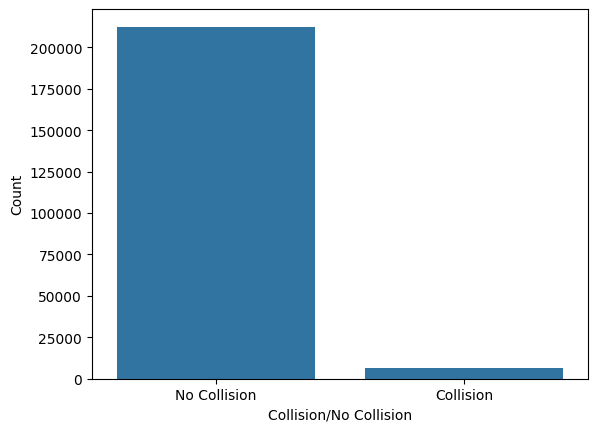

In [18]:
# Plot the class balance for the training set
sns.countplot(x=train_df_y_class)
plt.xlabel('Collision/No Collision')
plt.ylabel('Count')

plt.xticks([0,1],['No Collision','Collision'])
plt.show()

In [19]:
def eval_learner (record_title,y_true,y_predict):
    print(f'Records for {record_title}')
    cm = confusion_matrix(y_true,y_predict)

    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    
    records = tp+fn+tn+fp

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2*precision*recall)/(precision+recall)
    accuracy = (tp+tn)/(tp+fn+tn+fp)
    specificty = tn/(tn+fp)
    rocauc = roc_auc_score(y_true,y_predict)

    sns.heatmap(cm, annot=True,fmt='g', xticklabels=['No Collision','Collision'],yticklabels=['No Collision','Collision'])
    plt.ylabel('Actual', fontsize=13)
    plt.gca().xaxis.set_label_position('top') 
    plt.xlabel('Prediction', fontsize=13)
    plt.gca().xaxis.tick_top()

    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
    plt.show()

    print(f'Evaluating predictions of {records} records:')
    print(f'Precision = {precision}\nRecall = {recall}\nF1 = {f1}\nAccuracy = {accuracy}\nSpecificity = {specificty}\nROC/AUC Score = {rocauc}')

## Create initial SVM without balancing, scaling or feature selection

In [20]:
class_model = svm.SVC()
class_model = class_model.fit(train_df,train_df_y_class)

In [21]:
class_model_prediction = class_model.predict(test_df)

Records for SVM, Unbalanced/Scaled, Full dataset


C:\Users\01eco\AppData\Local\Temp\ipykernel_8608\4003691635.py:12: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp/(tp+fp)


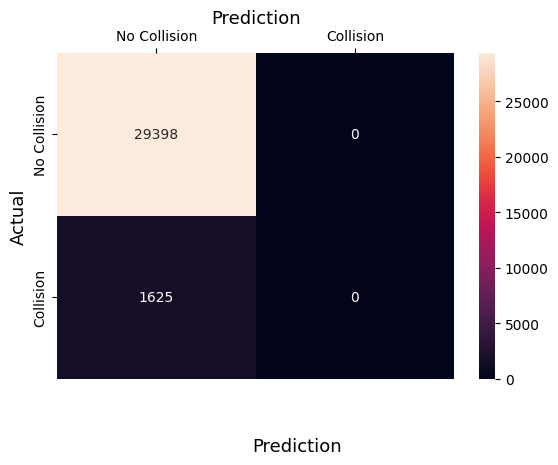

Evaluating predictions of 31023 records:
Precision = nan
Recall = 0.0
F1 = nan
Accuracy = 0.9476195081068884
Specificity = 1.0
ROC/AUC Score = 0.5


In [22]:
eval_learner('SVM, Unbalanced/Scaled, Full dataset',test_df_y_class,class_model_prediction)

## Perform feature selection using scikit-learn

In [23]:
n_features = window_size
selected_features = train_df.columns[SelectKBest(f_classif, k=n_features).fit(train_df, train_df_y_class).get_support()]
print(selected_features)

Index(['Is_Gaze_On_Hazard_t0', 'Is_Gaze_On_Hazard_t1', 'Is_Gaze_On_Hazard_t2',
       'Is_Gaze_On_Hazard_t3', 'Is_Gaze_On_Hazard_t4', 'Is_Gaze_On_Hazard_t5',
       'Is_Gaze_On_Hazard_t6', 'Is_Gaze_On_Hazard_t7', 'Is_Gaze_On_Hazard_t8',
       'Is_Gaze_On_Hazard_t9', 'Is_Gaze_On_Hazard_t10',
       'Is_Gaze_On_Hazard_t11', 'Is_Gaze_On_Hazard_t12',
       'Is_Gaze_On_Hazard_t13', 'Is_Gaze_On_Hazard_t14',
       'Is_Gaze_On_Hazard_t15', 'Is_Gaze_On_Hazard_t16',
       'Is_Gaze_On_Hazard_t17', 'Is_Gaze_On_Hazard_t18',
       'Is_Gaze_On_Hazard_t19'],
      dtype='object')


Selected label that indicates if the gaze of the driver is on the hazard vehicle. Train new model on reduced input set:

In [24]:
reduced_class = svm.SVC()
reduced_class.fit(train_df[selected_features],train_df_y_class)

SVC()

In [25]:
reduced_class_predict = reduced_class.predict(test_df[selected_features])

Records for SVM, Unbalanced, Reduced dataset


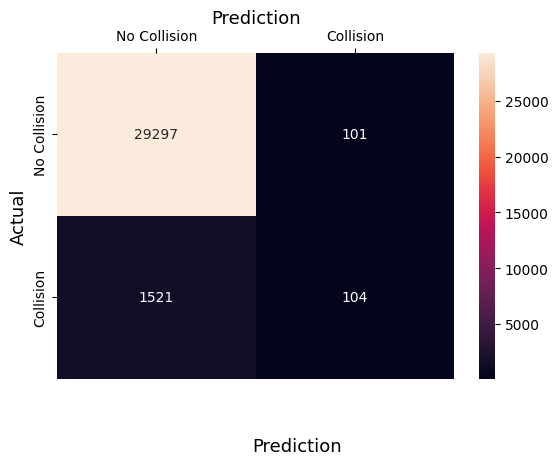

Evaluating predictions of 31023 records:
Precision = 0.5073170731707317
Recall = 0.064
F1 = 0.11366120218579234
Accuracy = 0.9477162105534603
Specificity = 0.9965643921355194
ROC/AUC Score = 0.5302821960677597


In [26]:
eval_learner('SVM, Unbalanced, Reduced dataset',test_df_y_class,reduced_class_predict)

## Apply SMOTE to balance the classes

In [27]:
smote = SMOTE(sampling_strategy=1.0,random_state=random_state)
train_df_res,train_df_y_class_res = smote.fit_resample(train_df,train_df_y_class)

c:\Users\01eco\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\01eco\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\01eco\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\01eco\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

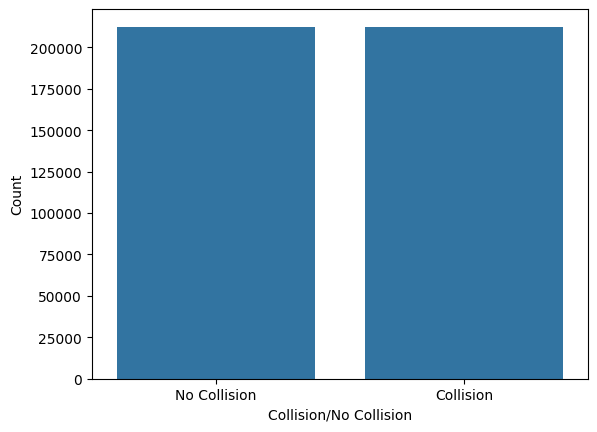

In [28]:
# Plot the class balance for the training set
sns.countplot(x=train_df_y_class_res)
plt.xlabel('Collision/No Collision')
plt.ylabel('Count')

plt.xticks([0,1],['No Collision','Collision'])
plt.show()

## Train SVM using the class-balanced dataset

In [29]:
# ~11 minutes
balanced_svm = svm.SVC()
balanced_svm.fit(train_df_res[selected_features],train_df_y_class_res)

SVC()

In [30]:
balanced_svm_prediction = balanced_svm.predict(test_df[selected_features])

Records for SVM, Balanced, reduced dataset


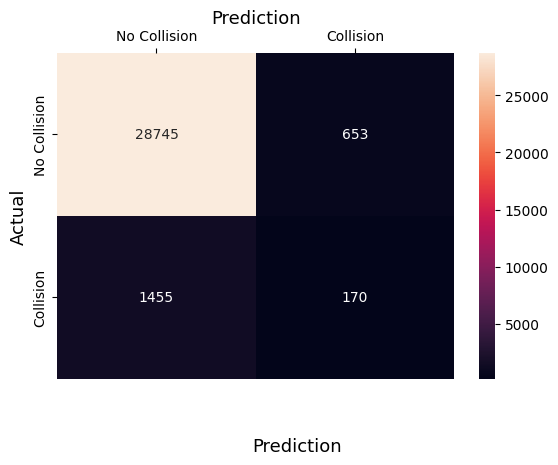

Evaluating predictions of 31023 records:
Precision = 0.2065613608748481
Recall = 0.10461538461538461
F1 = 0.1388888888888889
Accuracy = 0.9320504142088128
Specificity = 0.9777876045989523
ROC/AUC Score = 0.5412014946071685


In [31]:
eval_learner('SVM, Balanced, reduced dataset',test_df_y_class,balanced_svm_prediction)

### Use the balanced SVM on the validation set

In [32]:
# ~11 minutes
balanced_validated = balanced_svm.predict(validate_df[selected_features])

Records for SVM, balanced, reduced dataset, validation


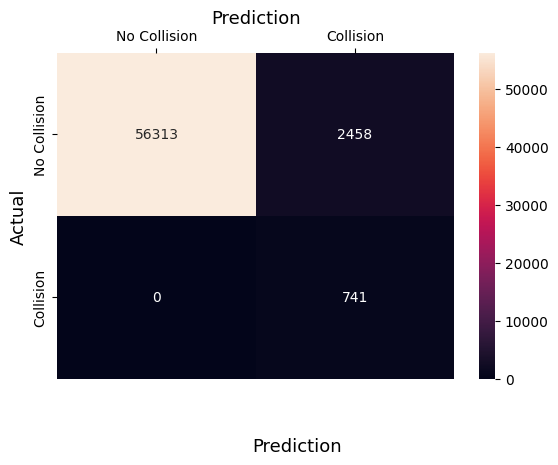

Evaluating predictions of 59512 records:
Precision = 0.23163488590184433
Recall = 1.0
F1 = 0.3761421319796954
Accuracy = 0.9586974055652642
Specificity = 0.9581766517500128
ROC/AUC Score = 0.9790883258750064


In [33]:
eval_learner('SVM, balanced, reduced dataset, validation',validate_df_y_class,balanced_validated)

### Random Forest Classifier

In [34]:
rf_classifier = RandomForestClassifier(max_depth=3,n_estimators=100,random_state=random_state)
rf_classifier.fit(train_df_res[selected_features],train_df_y_class_res)

RandomForestClassifier(max_depth=3, random_state=42)

In [35]:
rf_classifier_prediction = rf_classifier.predict(test_df[selected_features])

Records for RF, balanced, reduced dataset


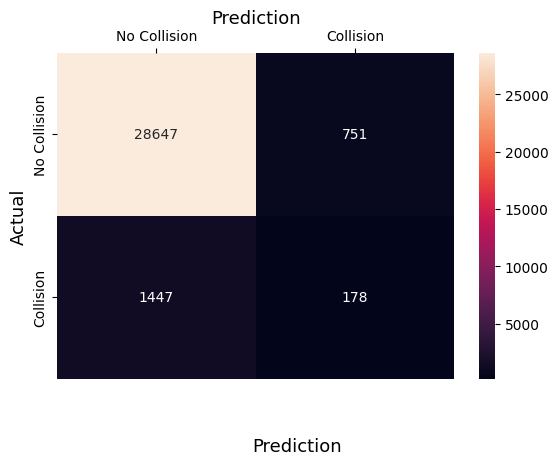

Evaluating predictions of 31023 records:
Precision = 0.1916038751345533
Recall = 0.10953846153846154
F1 = 0.139389193422083
Accuracy = 0.9291493408116559
Specificity = 0.9744540444928227
ROC/AUC Score = 0.5419962530156421


In [36]:
eval_learner('RF, balanced, reduced dataset',test_df_y_class,rf_classifier_prediction)

### MLP Classifier

In [37]:
mlp_classifier = MLPClassifier(random_state=random_state,max_iter=5000)
mlp_classifier.fit(train_df_res[selected_features],train_df_y_class_res)

MLPClassifier(max_iter=5000, random_state=42)

In [38]:
mlp_classifier_predict = mlp_classifier.predict(test_df[selected_features])

Records for MLP, balanced, reduced dataset


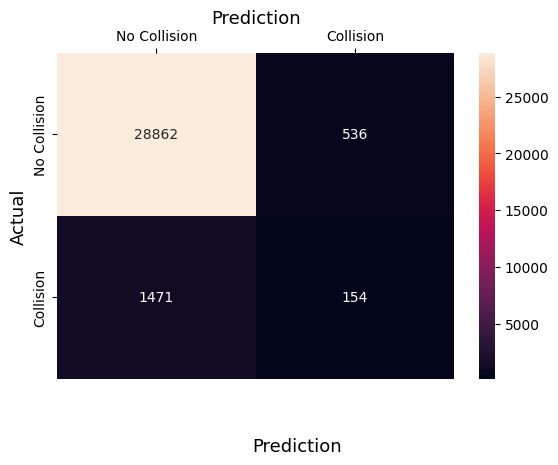

Evaluating predictions of 31023 records:
Precision = 0.22318840579710145
Recall = 0.09476923076923077
F1 = 0.13304535637149026
Accuracy = 0.9353060632434
Specificity = 0.9817674671746377
ROC/AUC Score = 0.5382683489719342


In [39]:
eval_learner('MLP, balanced, reduced dataset',test_df_y_class,mlp_classifier_predict)